# **CHAPTER 2**
# **End-to-End Machine Learning Project**

Here are the main steps of a Machine Learning project:
 - Understanding the big picture and the issues of the business
 - Identifying and getting the data
 - Data Exploration and Visualization
 - Data preparation before the model training: missing values, feature extraction
 - Model training and model selection
 - Fine-tuning your model
 - Launch your model into production and monitor it

## **Setup**

In [8]:
import sklearn
assert sklearn.__version__ >= "0.20"

import os
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# **California Housing Data Analysis**

## Download the data

In [9]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/dfongang/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets")
HOUSING_URL = DOWNLOAD_ROOT + "chapter_02/datasets/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [10]:
fetch_housing_data()

### Load the housing data

In [11]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## **Take a Quick Look at the Data Structure**


In [12]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing.shape

(20640, 10)

### How many districts per categories?

In [15]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [16]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Plot an histogram of each attribute

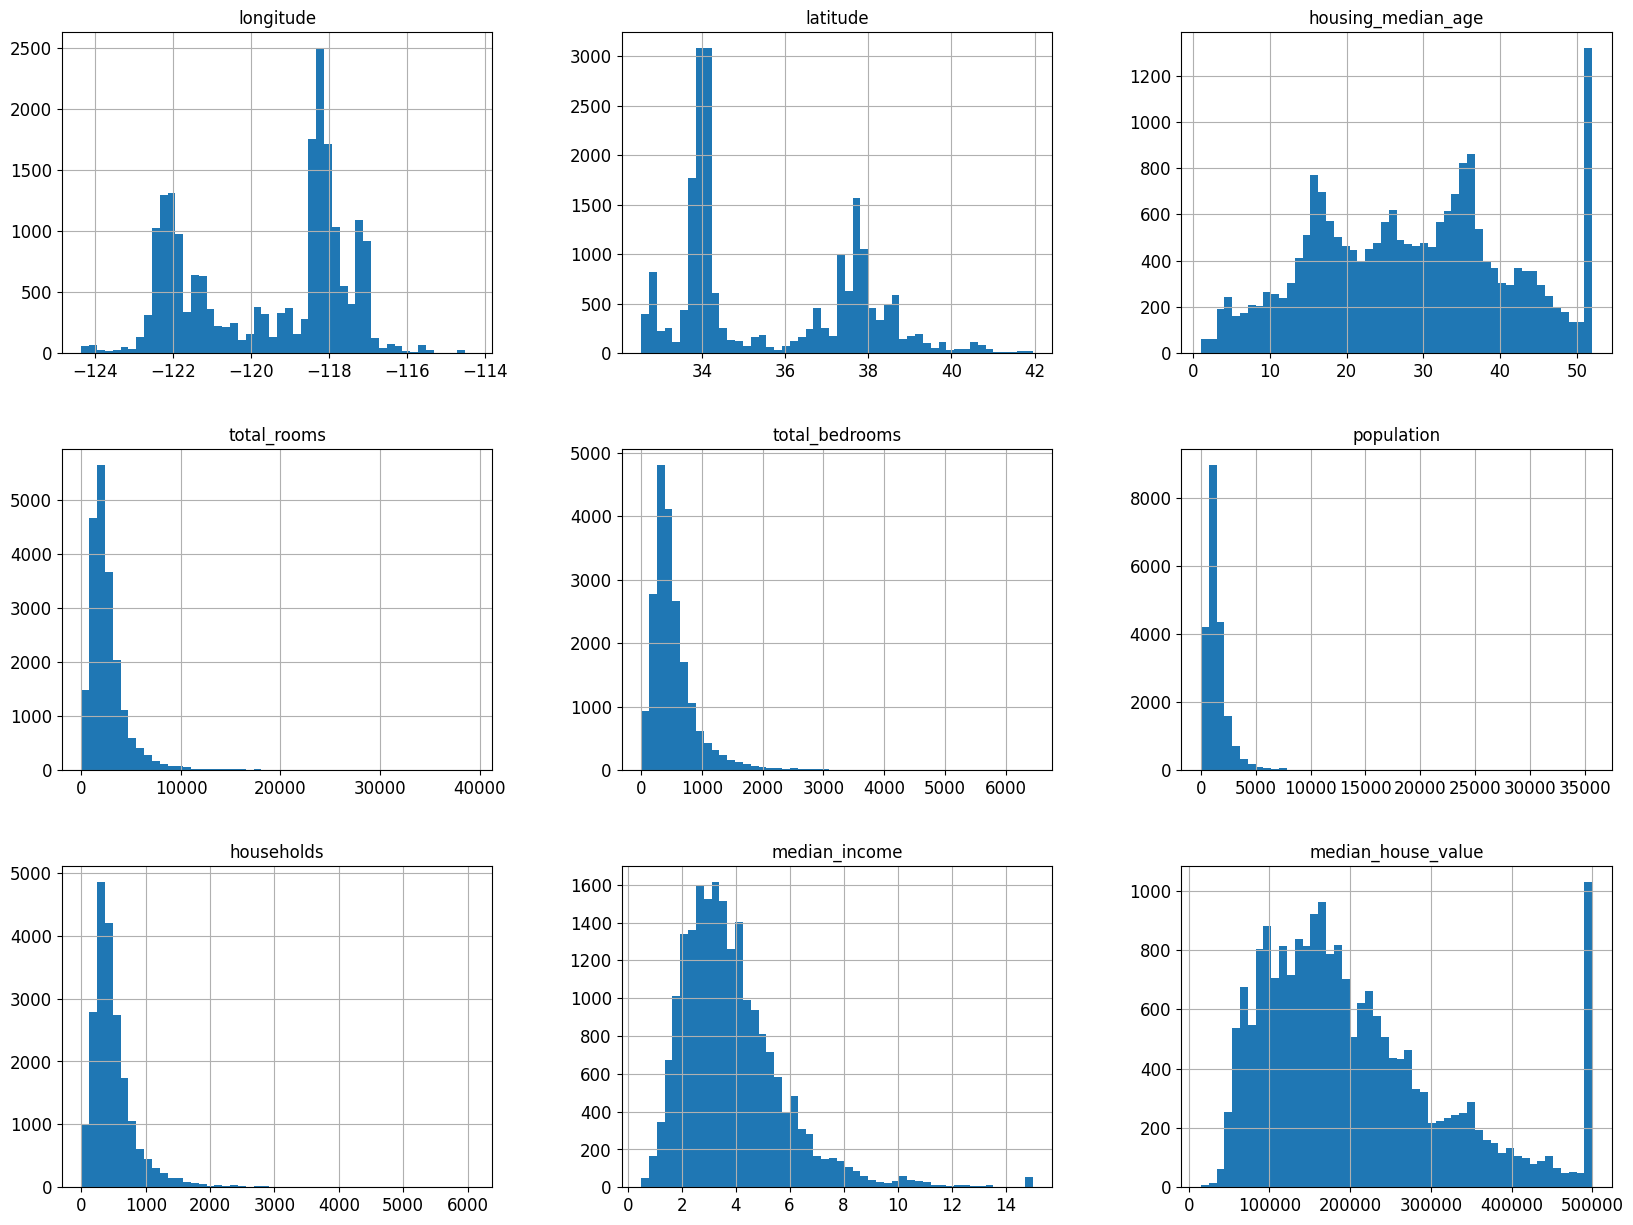

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## **Create a Test Set**

In [18]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [19]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
train_set, test_set = split_train_test(data=housing, test_ratio=0.2)

In [21]:
print('len(test_set):', len(test_set))
print('len(train_set):', len(train_set))
print('len(test_set)/len(housing):', len(test_set)/len(housing))
print('len(train_set)/len(housing):', len(train_set)/len(housing))

len(test_set): 4128
len(train_set): 16512
len(test_set)/len(housing): 0.2
len(train_set)/len(housing): 0.8


In [22]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    # in_test_set = pd.Series([test_set_check(id_, test_ratio) for id_ in ids])
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]



In [23]:
# add an index column
housing_with_id = housing.reset_index()

In [24]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
train_set, test_set = split_train_test_by_id(data=housing_with_id, test_ratio=0.2, id_column='index')

In [26]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


### Using `train_test_split` from Scikit-Learn

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Stratified Shuffle Split

<Axes: >

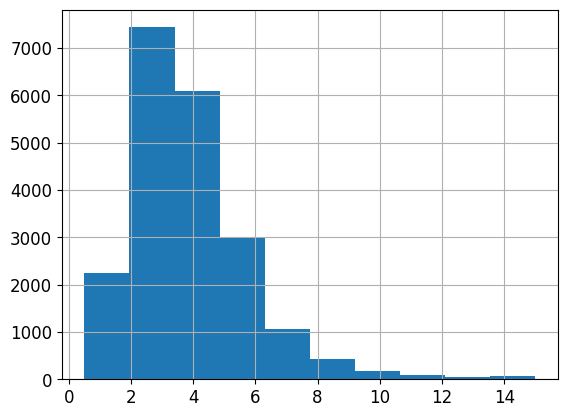

In [28]:
housing['median_income'].hist()

<Axes: >

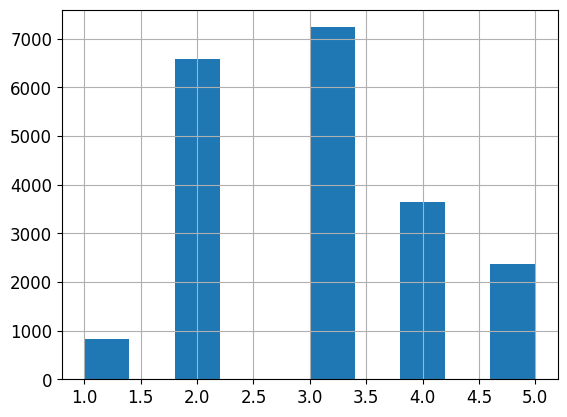

In [29]:
# split median income into categories
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1,2,3,4,5]
                               )
housing['income_cat'].hist()

In [30]:
housing['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

### Comparing the income category proportion in the housing data with the test set

In [32]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [33]:
housing['income_cat'].value_counts()/len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [34]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,2
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,2
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,4
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,3


In [35]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_pros = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_pros["Rand. %error"] = 100 * compare_pros["Random"] / compare_pros["Overall"] -100
compare_pros["Strat. %error"] = 100 * compare_pros["Stratified"] / compare_pros["Overall"] -100

In [36]:
compare_pros

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [37]:
# removing the `income_cat` attribute

In [38]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## **Discover and Visualize the Data to Gain Insights**

In [39]:
# make a copy of the stratified train set.
housing = strat_train_set.copy()

In [40]:
print('housing.columns:', list(housing.columns))
print('housing.shape:', housing.shape)

housing.columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
housing.shape: (16512, 10)


### Visualizing Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

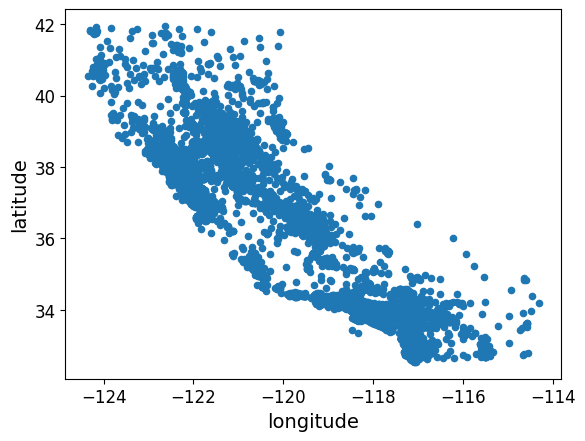

In [41]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

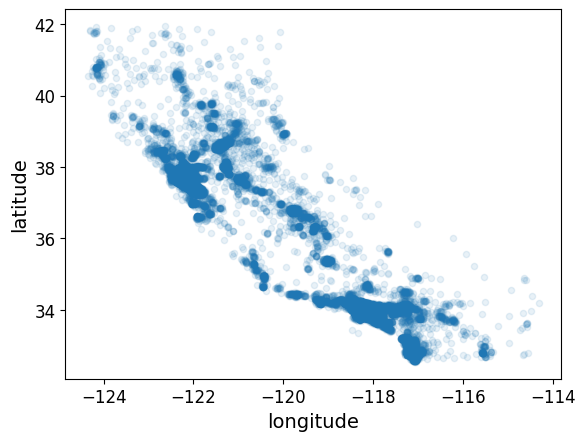

In [42]:
# using the `alpha` option to see the places with high density ot data points.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

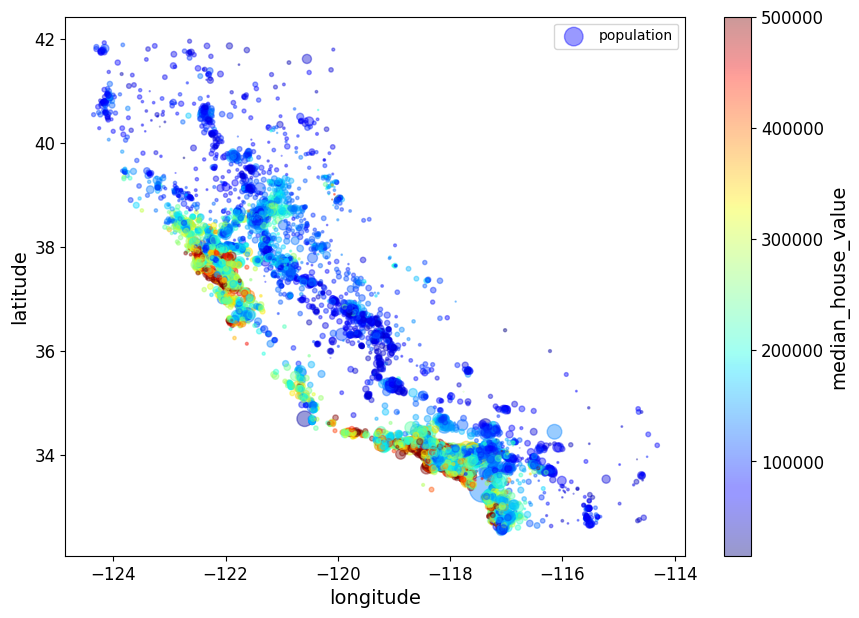

In [43]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False
)
plt.legend()

In [44]:
# Download the California image
import urllib.request


image_path = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(image_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(image_path, filename))

('./images/california.png', <http.client.HTTPMessage at 0x7651bc26bfa0>)

Saving figure california_housing_prices_plot


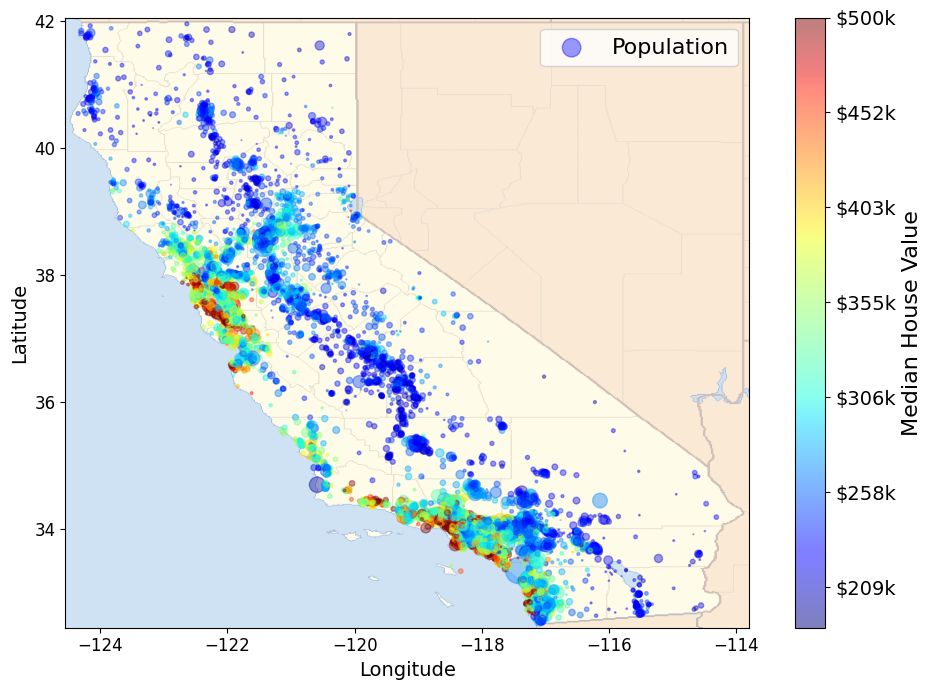

In [45]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(image_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="Population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False
)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%round(v/1000) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig('california_housing_prices_plot')
plt.show()

### Looking for correlations

In [46]:
# compute the Pearsons correlation
corr_matrix = housing.corr(numeric_only=True)

In [47]:
# correlation of each attribute with the `median_house_value`.
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

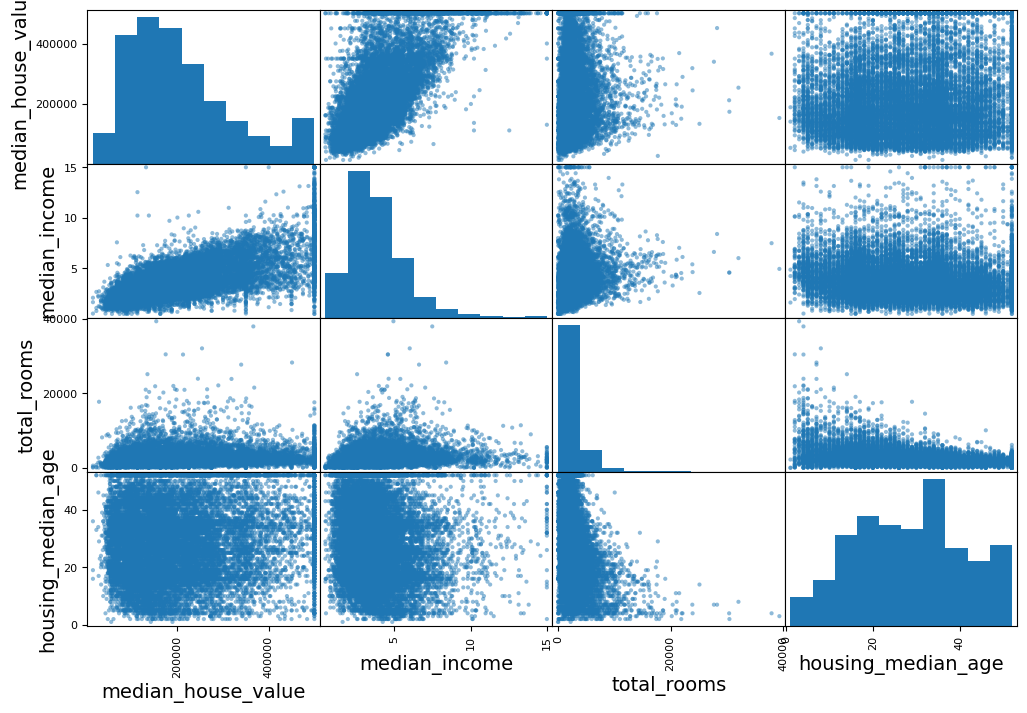

In [48]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

Saving figure income_vs_house_value_scatterplot


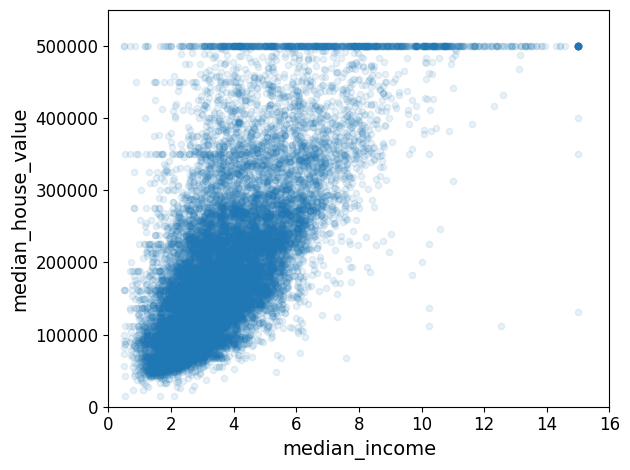

In [49]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")
plt.show()

### Experimenting with Attribute Combinations

In [50]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [51]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [52]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## **Prepare the Data for Machine Learing Algorithms**

In [53]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [54]:
housing.shape

(16512, 13)

### Data Cleaning

In [55]:
housing = strat_train_set.drop("median_house_value" ,axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Illustration of incomplete rows

In [56]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [57]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
sample_incomplete_rows.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [58]:
# dropna: remove all rows with missing values
sample_incomplete_rows.dropna(axis=0, subset=['total_bedrooms'], inplace=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [59]:
# drop: remove the column with missing values
sample_incomplete_rows.drop(columns=['total_bedrooms'], axis=1, inplace=False).head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [60]:
# Impute missing values with the median value
median = housing['total_bedrooms'].median()
ids = sample_incomplete_rows['total_bedrooms'].isnull()
sample_incomplete_rows.loc[ids, 'total_bedrooms'] = median # one can use fillna instaed
sample_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [61]:
## Dealing with missing values using `SimpleImputer`

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)

# This compute the median of each numerical attribute
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [62]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, 
                          index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [63]:
housing_tr.loc[sample_incomplete_rows.index.values].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [64]:
housing_tr.loc[ids.index.values,].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


### Handling Text and Categorical Attributes

In [65]:
housing_cat = housing["ocean_proximity"]
type(housing_cat)

pandas.core.series.Series

In [66]:
housing_cat = housing[["ocean_proximity"]]
type(housing_cat)

pandas.core.frame.DataFrame

In [67]:
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [68]:
housing_cat['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: count, dtype: int64

In [69]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
type(housing_cat_encoded)

numpy.ndarray

In [70]:
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [71]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [72]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [73]:
type(housing_cat_1hot)

scipy.sparse._csr.csr_matrix

In [74]:
housing_cat_1hot.shape

(16512, 5)

In [75]:
# convert the sparse matrix to a Numpy array matrix
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [76]:
housing_cat_1hot.toarray().shape

(16512, 5)

In [77]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

Let us add `bedrooms_per_room`, `rooms_per_household` and `population_per_household` using a custom transformer

In [78]:
dict(zip(list(range(len(housing.columns))), housing.columns))

{0: 'longitude',
 1: 'latitude',
 2: 'housing_median_age',
 3: 'total_rooms',
 4: 'total_bedrooms',
 5: 'population',
 6: 'households',
 7: 'median_income',
 8: 'ocean_proximity'}

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin

room_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room    
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:,room_ix] / X[:, households_ix]
        population_per_households = X[:,population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_households, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_households]
        

In [80]:
attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.fit_transform(housing.values)
housing_extra_attribs.shape

(16512, 11)

Convert back to a `DataFrame`.

In [81]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
                                     columns=housing.columns.to_list() + ['rooms_per_household', 'population_per_households'],
                                     index=housing.index.values)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_households
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


### Feature Scaling

- Normalization : transforming the features values scale to range from 0 to 1. (`MinMaxScaler` from Scikit-Learn)
- Standardization: transforming the input data to obtain a distribution with mean 0 and standard deviation equals 1.(`StandardScaler`) \
Standard scaler is less affected by outliers than normalization.

### Transformation Pipelines

In [82]:
# Pipeline for numerical attributes transformation

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributeAdder(add_bedrooms_per_room=True)),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [83]:
housing_num_tr.shape

(16512, 11)

In [84]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [85]:
housing_prepared.shape

(16512, 16)

In [86]:
cat_1hot_ = [str(cat).lower().replace(' ', '_') +  '_1hot' for cat in cat_encoder.categories_[0]]
cat_1hot_

['<1h_ocean_1hot',
 'inland_1hot',
 'island_1hot',
 'near_bay_1hot',
 'near_ocean_1hot']

In [87]:
housing_prepared = pd.DataFrame(
    housing_prepared,
    columns=list(housing)[:-1] + ['rooms_per_household', 'population_per_households', 'bedrooms_per_room'] + cat_1hot_,
    index=housing.index.values
)
housing_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_households,bedrooms_per_room,<1h_ocean_1hot,inland_1hot,island_1hot,near_bay_1hot,near_ocean_1hot
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0


In [88]:
housing_prepared.shape

(16512, 16)

## **Select and Train a Model**

Selecting and training machine learning models

### Training and Evaluating on The Training Set

In [89]:
# Training a `LinearRegression` model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X=housing_prepared, y=housing_labels)


LinearRegression()

In [90]:
housing.shape

(16512, 9)

In [91]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [92]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# back to a `DataFrame`
some_data_prepared = pd.DataFrame(
    some_data_prepared,
    columns=list(some_data)[:-1] + ['rooms_per_household', 'population_per_households', 'bedrooms_per_room'] + cat_1hot_,
    index=some_data.index.values
)
print('some_data_prepared.shape:', some_data_prepared.shape)



some_data_prepared.shape: (5, 16)


In [93]:
# make predictions
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', some_labels.values)

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [ 72100. 279600.  82700. 112500. 238300.]


In [94]:
# Evaluate the linear regression model on the training set
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(y_true=housing_labels, y_pred=housing_predictions)
lin_rmse = root_mean_squared_error(y_true=housing_labels, y_pred=housing_predictions)
lin_rmse_ = np.sqrt(lin_mse)

print('lin_mse:', lin_mse)
print('lin_rmse:', lin_rmse)
print('lin_rmse_:', lin_rmse_)


lin_mse: 4709785076.060029
lin_rmse: 68627.87390018745
lin_rmse_: 68627.87390018745


In [95]:
# Training a `DecisionTreeRegressor`
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X=housing_prepared, y=housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
# Evaluate the model
tree_rmse = root_mean_squared_error(y_true=housing_labels, y_pred=housing_predictions)
print('tree_rmse:', tree_rmse)

tree_rmse: 0.0


### Better Evaluation Using Cross-Validation


In [96]:
tree_reg = DecisionTreeRegressor(random_state=42)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X=housing_prepared, y=housing_labels,
                                 scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
tree_rmse_score = -scores

In [97]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', np.mean(scores))
    print('Standard deviation:', np.std(scores))

display_scores(scores=tree_rmse_score)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [98]:
scores = cross_val_score(lin_reg, X=housing_prepared, y=housing_labels,
                                 scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
lin_rmse_score = -scores

display_scores(scores=lin_rmse_score)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694


In [99]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_jobs=-1)
forest_reg.fit(X=housing_prepared, y=housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)

forest_rmse = root_mean_squared_error(y_true=housing_labels, y_pred=housing_predictions)
print('forest_rmse:', forest_rmse)

scores = cross_val_score(forest_reg, X=housing_prepared, y=housing_labels,
                                 scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
forest_rmse_score = -scores

display_scores(scores=forest_rmse_score)

forest_rmse: 18754.384349586322
Scores: [51174.51109626 48915.77912048 46765.81838812 51940.31828476
 47770.90793512 51632.37645866 52499.1517625  49823.70063232
 48493.92162821 53804.36725481]
Mean: 50282.085256125276
Standard deviation: 2159.5342939019356


## Fine-Tune Your Model

### Grid Search

In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features':[2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid=param_grid, scoring='neg_root_mean_squared_error',
                           cv=5, return_train_score=True, n_jobs=-1)

grid_search.fit(housing_prepared, housing_labels)

/home/dfg/dev/handson-ml2/.venv/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [101]:
print('grid_search.best_params_:', grid_search.best_params_)
print('grid_search.best_estimator_:', grid_search.best_estimator_)

grid_search.best_params_: {'max_features': 6, 'n_estimators': 30}
grid_search.best_estimator_: RandomForestRegressor(max_features=6, n_estimators=30)


In [102]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [103]:
# the evaluation scores

cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(-mean_score, params)

63444.03134164288 {'max_features': 2, 'n_estimators': 3}
55348.46287755829 {'max_features': 2, 'n_estimators': 10}
52494.91531373027 {'max_features': 2, 'n_estimators': 30}
59360.09706260679 {'max_features': 4, 'n_estimators': 3}
53265.89074277198 {'max_features': 4, 'n_estimators': 10}
49931.75149941703 {'max_features': 4, 'n_estimators': 30}
58748.41847286074 {'max_features': 6, 'n_estimators': 3}
51678.50628358349 {'max_features': 6, 'n_estimators': 10}
49794.45014190044 {'max_features': 6, 'n_estimators': 30}
59250.941211204816 {'max_features': 8, 'n_estimators': 3}
52068.74551773934 {'max_features': 8, 'n_estimators': 10}
50073.79160150528 {'max_features': 8, 'n_estimators': 30}
61745.871119828385 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53999.99847265643 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59912.42283435933 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52046.03484593516 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

### Randomized Search

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}
forest_reg = RandomForestRegressor(random_state=42)
rand_search = RandomizedSearchCV(forest_reg, scoring='neg_root_mean_squared_error',
                                 param_distributions=param_distribs ,random_state=42,
                                 cv=5, return_train_score=True, n_jobs=-1, n_iter=10)

rand_search.fit(housing_prepared, housing_labels)

/home/dfg/dev/handson-ml2/.venv/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7651c00d9a50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x76523e763730>},
                   random_state=42, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [105]:
cv_res = rand_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(-mean_score, params)

49110.07831382369 {'max_features': 7, 'n_estimators': 180}
51442.35311221356 {'max_features': 5, 'n_estimators': 15}
50685.123452207205 {'max_features': 3, 'n_estimators': 72}
50778.15551826735 {'max_features': 5, 'n_estimators': 21}
49156.60395020091 {'max_features': 7, 'n_estimators': 122}
50648.78047351982 {'max_features': 3, 'n_estimators': 75}
50506.76380221585 {'max_features': 3, 'n_estimators': 88}
49514.104333807656 {'max_features': 5, 'n_estimators': 100}
50296.89586825691 {'max_features': 3, 'n_estimators': 150}
65143.10765985043 {'max_features': 5, 'n_estimators': 2}


### Analyze the Best Models and Their Errors

In [106]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.34305875e-02, 6.56671729e-02, 4.31166811e-02, 1.80920129e-02,
       1.71181618e-02, 1.68758652e-02, 1.67440182e-02, 3.25820898e-01,
       6.11676703e-02, 1.08560235e-01, 7.68679535e-02, 1.17474845e-02,
       1.58015091e-01, 7.37837582e-05, 2.10014643e-03, 4.60223771e-03])

In [107]:
cat_1hot_

['<1h_ocean_1hot',
 'inland_1hot',
 'island_1hot',
 'near_bay_1hot',
 'near_ocean_1hot']

In [108]:
feature_names = list(housing)[:-1] + ['rooms_per_household', 'population_per_households', 'bedrooms_per_room'] + cat_1hot_
dict(zip(feature_importances, feature_names))

{np.float64(0.07343058750175362): 'longitude',
 np.float64(0.06566717288710848): 'latitude',
 np.float64(0.04311668110895319): 'housing_median_age',
 np.float64(0.01809201285920704): 'total_rooms',
 np.float64(0.017118161848291503): 'total_bedrooms',
 np.float64(0.016875865245411518): 'population',
 np.float64(0.016744018188692304): 'households',
 np.float64(0.32582089836245304): 'median_income',
 np.float64(0.061167670299749816): 'rooms_per_household',
 np.float64(0.10856023514927089): 'population_per_households',
 np.float64(0.07686795351422267): 'bedrooms_per_room',
 np.float64(0.011747484509778897): '<1h_ocean_1hot',
 np.float64(0.15801509062547878): 'inland_1hot',
 np.float64(7.378375820218705e-05): 'island_1hot',
 np.float64(0.002100146433145821): 'near_bay_1hot',
 np.float64(0.004602237708280225): 'near_ocean_1hot'}

In [109]:
sorted(zip(feature_importances, feature_names), reverse=True)

[(np.float64(0.32582089836245304), 'median_income'),
 (np.float64(0.15801509062547878), 'inland_1hot'),
 (np.float64(0.10856023514927089), 'population_per_households'),
 (np.float64(0.07686795351422267), 'bedrooms_per_room'),
 (np.float64(0.07343058750175362), 'longitude'),
 (np.float64(0.06566717288710848), 'latitude'),
 (np.float64(0.061167670299749816), 'rooms_per_household'),
 (np.float64(0.04311668110895319), 'housing_median_age'),
 (np.float64(0.01809201285920704), 'total_rooms'),
 (np.float64(0.017118161848291503), 'total_bedrooms'),
 (np.float64(0.016875865245411518), 'population'),
 (np.float64(0.016744018188692304), 'households'),
 (np.float64(0.011747484509778897), '<1h_ocean_1hot'),
 (np.float64(0.004602237708280225), 'near_ocean_1hot'),
 (np.float64(0.002100146433145821), 'near_bay_1hot'),
 (np.float64(7.378375820218705e-05), 'island_1hot')]

###  Evaluate Your Model on the Test Set

In [110]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop(['median_house_value'], axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

X_test_prepared = pd.DataFrame(
    X_test_prepared,
    columns=list(X_test)[:-1] + ['rooms_per_household', 'population_per_households', 'bedrooms_per_room'] + cat_1hot_,
    index=X_test.index.values
)

final_predictions = final_model.predict(X_test_prepared)

final_rmse = root_mean_squared_error(y_test, final_predictions)


In [111]:
final_rmse

np.float64(48394.977469637655)

Confidence interval at 95%

In [112]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                 loc=squared_errors.mean(),
                 scale=stats.sem(squared_errors)))


array([46435.01667243, 50278.59301139])

In [113]:
z = 1.96
n = len(y_test)
squared_errors = (y_test - final_predictions)**2
sample_mean = squared_errors.mean()
sample_std = squared_errors.std()

np.sqrt([sample_mean - z*(sample_std/np.sqrt(n)), sample_mean + z*(sample_std/np.sqrt(n))])

array([46435.56684907, 50278.08488774])

In [114]:
squared_errors = (y_test - final_predictions)**2
n = len(squared_errors)
sample_mean = squared_errors.mean()
sample_std = squared_errors.std(ddof=1)
tscore = stats.t.ppf((1+confidence)/2, df=n-1)
tmargin = tscore*(sample_std/np.sqrt(n))

np.sqrt(sample_mean - tmargin), np.sqrt(sample_mean + tmargin)

(np.float64(46435.01667242571), np.float64(50278.59301139023))

## **Exercises**

### 1.
### Try a Support Vector Machine regressor.

In [115]:
from sklearn.svm import SVR

param_grid = [
    {
        'kernel': ['rbf', 'linear'],
        'C':[0.1, 1, 5, 10, 100, 10**3, 10**4],
        'gamma':[1/8, 1/12, 1/30]     
    },
]

svr_reg = SVR()
grid_search = GridSearchCV(svr_reg, param_grid=param_grid, scoring='neg_root_mean_squared_error',
                           cv=5, return_train_score=True, n_jobs=-1)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 5, 10, 100, 1000, 10000],
                          'gamma': [0.125, 0.08333333333333333,
                                    0.03333333333333333],
                          'kernel': ['rbf', 'linear']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [116]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(-mean_score, params)

118905.07163475474 {'C': 0.1, 'gamma': 0.125, 'kernel': 'rbf'}
118255.75927825882 {'C': 0.1, 'gamma': 0.125, 'kernel': 'linear'}
118902.67759323465 {'C': 0.1, 'gamma': 0.08333333333333333, 'kernel': 'rbf'}
118255.75927825882 {'C': 0.1, 'gamma': 0.08333333333333333, 'kernel': 'linear'}
118908.5487970538 {'C': 0.1, 'gamma': 0.03333333333333333, 'kernel': 'rbf'}
118255.75927825882 {'C': 0.1, 'gamma': 0.03333333333333333, 'kernel': 'linear'}
118656.78138299592 {'C': 1, 'gamma': 0.125, 'kernel': 'rbf'}
112567.6925994952 {'C': 1, 'gamma': 0.125, 'kernel': 'linear'}
118635.12992743896 {'C': 1, 'gamma': 0.08333333333333333, 'kernel': 'rbf'}
112567.6925994952 {'C': 1, 'gamma': 0.08333333333333333, 'kernel': 'linear'}
118684.75492655684 {'C': 1, 'gamma': 0.03333333333333333, 'kernel': 'rbf'}
112567.6925994952 {'C': 1, 'gamma': 0.03333333333333333, 'kernel': 'linear'}
117585.13401923174 {'C': 5, 'gamma': 0.125, 'kernel': 'rbf'}
95049.6992396778 {'C': 5, 'gamma': 0.125, 'kernel': 'linear'}
117488.

In [117]:
rmse = - grid_search.best_score_
rmse

np.float64(60701.605885999066)

### 2.
### Replace `GridSearchCV`  with `RandomizedSearchCV`

In [118]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': expon(scale=1.0),
    'C': reciprocal(0.1, 10**4),
}
svr_reg = SVR()
rand_search = RandomizedSearchCV(svr_reg, scoring='neg_root_mean_squared_error',
                                 param_distributions=param_distribs, random_state=42,
                                 cv=5, return_train_score=True, n_jobs=-1, n_iter=30, verbose=2)

rand_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END C=101.29197956845728, gamma=1.2312500617045903, kernel=linear; total time=   7.2s
[CV] END C=791.507439765622, gamma=0.9084469696321253, kernel=linear; total time=   7.9s
[CV] END C=101.29197956845728, gamma=1.2312500617045903, kernel=linear; total time=   7.8s
[CV] END C=791.507439765622, gamma=0.9084469696321253, kernel=linear; total time=   7.9s
[CV] END C=101.29197956845728, gamma=1.2312500617045903, kernel=linear; total time=   8.0s
[CV] END C=791.507439765622, gamma=0.9084469696321253, kernel=linear; total time=   8.4s
[CV] END C=791.507439765622, gamma=0.9084469696321253, kernel=linear; total time=   8.6s
[CV] END C=101.29197956845728, gamma=1.2312500617045903, kernel=linear; total time=  10.7s
[CV] END C=791.507439765622, gamma=0.9084469696321253, kernel=linear; total time=  10.8s
[CV] END C=101.29197956845728, gamma=1.2312500617045903, kernel=linear; total time=  11.4s
[CV] END C=0.6025215736203859, gamma=0

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x76523e762fb0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x76523e7817e0>,
                                        'kernel': ['rbf', 'linear', 'poly']},
                   random_state=42, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=2)

### 3.
### Transformer to select only the most important features.

In [119]:
feature_importances

array([7.34305875e-02, 6.56671729e-02, 4.31166811e-02, 1.80920129e-02,
       1.71181618e-02, 1.68758652e-02, 1.67440182e-02, 3.25820898e-01,
       6.11676703e-02, 1.08560235e-01, 7.68679535e-02, 1.17474845e-02,
       1.58015091e-01, 7.37837582e-05, 2.10014643e-03, 4.60223771e-03])

In [120]:
list(housing_prepared.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_households',
 'bedrooms_per_room',
 '<1h_ocean_1hot',
 'inland_1hot',
 'island_1hot',
 'near_bay_1hot',
 'near_ocean_1hot']

In [121]:
np.argsort(feature_importances)

array([13, 14, 15, 11,  6,  5,  4,  3,  2,  8,  1,  0, 10,  9, 12,  7])

In [122]:
feature_importances_ix = list(np.argsort(feature_importances))
feature_importances_ix.reverse()
feature_importances_ix

[np.int64(7),
 np.int64(12),
 np.int64(9),
 np.int64(10),
 np.int64(0),
 np.int64(1),
 np.int64(8),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(11),
 np.int64(15),
 np.int64(14),
 np.int64(13)]

A function to select the indices of the top k features.

In [123]:
def indices_of_top_k(arr, k):
    idx_ = list(np.argsort(arr))
    idx_.reverse()
    return idx_[:k]

In [124]:
from sklearn.base import TransformerMixin

class TopFeatureSelector(TransformerMixin, BaseEstimator):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):  
        return X[:, self.feature_indices_]

In [125]:
k = 5

In [126]:
idx_ = list(np.argsort(feature_importances))
idx_

[np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(11),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(3),
 np.int64(2),
 np.int64(8),
 np.int64(1),
 np.int64(0),
 np.int64(10),
 np.int64(9),
 np.int64(12),
 np.int64(7)]

In [127]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

[np.int64(7), np.int64(12), np.int64(9), np.int64(10), np.int64(0)]

In [128]:
np.array(feature_names)[np.array(top_k_feature_indices, dtype=np.int64)]

array(['median_income', 'inland_1hot', 'population_per_households',
       'bedrooms_per_room', 'longitude'], dtype='<U25')

In [129]:
top_k_feature_indices = np.array(top_k_feature_indices, dtype=np.int64)
top_k_feature_indices

array([ 7, 12,  9, 10,  0])

In [130]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [131]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [132]:
housing_prepared_top_k_features[0:3]

array([[-0.8936472 ,  1.        ,  0.00622264, -0.12112176, -0.94135046],
       [ 1.292168  ,  0.        , -0.04081077, -0.81086696,  1.17178212],
       [-0.52543365,  1.        , -0.07537122, -0.33827252,  0.26758118]])

In [133]:
housing_prepared.iloc[0:3, top_k_feature_indices]

,median_income,inland_1hot,population_per_households,bedrooms_per_room,longitude
12655,-0.893647,1.0,0.006223,-0.121122,-0.941350
15502,1.292168,0.0,-0.040811,-0.810867,1.171782
2908,-0.525434,1.0,-0.075371,-0.338273,0.267581


### 4.

Try creating a single pipeline that does the full data preparation plus the final prediction.

In [134]:
preparation_and_prediction_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('prediction', grid_search.best_estimator_),
])

In [135]:
preparation_and_prediction_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributeAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('prediction', SVR(C=10000, gamma=0.125))])

In [136]:
some_data = housing.iloc[:5,:]
some_labels = housing_labels.iloc[:5]

print('Predictions:\t', preparation_and_prediction_pipeline.predict(some_data))
print('Labels:\t\t', list(some_labels))

Predictions:	 [ 70542.7544662  298915.06331065 115045.01682502 155047.62410388
 229724.1224966 ]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [137]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rand_search.best_params_))
])

In [138]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributeAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder()...
                 TopFeatureSelector(feature_importances=array([7.34305875e-02, 6.56671729e-02, 4.31166811e-02, 1.80920129e-02,
       1.71181618e-02, 1.68758652e-02, 1.67440182e-02, 3.25820898e-01,
       6.11676703e-02, 1.08560235e-01, 7.68679535e-02, 1.17474845e-02,
       1.58015091e-01, 7.37837582e-05, 2.10014643e-03, 4.60223771e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=np.float64(7045.683638454505),
                     gamma=np.float64(1.4922453771381408), kernel='linear'))])

In [139]:
some_data = housing.iloc[:5,:]
some_labels = housing_labels.iloc[:5]

print('Predictions:\t', prepare_select_and_predict_pipeline.predict(some_data))
print('Labels:\t\t', list(some_labels))

Predictions:	 [ 78866.56949596 298854.5193081  100803.01982687 154884.50961555
 227875.1860858 ]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]
